In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import norm, skew

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [2]:
raw_data = pd.read_excel('mpg.data.xlsx')
df = raw_data.copy()
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN


In [3]:
df.drop('Unnamed: 9', axis=1, inplace=True)
df.drop('Unnamed: 10', axis=1, inplace=True)
df.drop('Unnamed: 11', axis=1, inplace=True)
df.drop('Unnamed: 12', axis=1, inplace=True)


In [4]:
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
def split_func(s):
    return(s.split(' '))

df ['car name'] = df['car name'].apply(split_func)

for i in range(len(df['car name'])):
    df['car name'][i] = df['car name'][i][0]
    
df.head()

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford


In [7]:
df.rename(columns={'displayments': 'Displacement',
                    'mpg': 'MPG',
                    'cylinders': 'Cylinders',
                    'horsepower': 'Horsepower',
                     'weight': 'Weight',
                     'acceleration': 'Acceleration',
                      'model year': 'Model Year',
                      'origin': 'Origin',
                      'car name': 'Brand'}, inplace=True)

In [8]:
df['Brand'].value_counts()

ford             53
chevrolet        44
plymouth         32
amc              29
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       16
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
volvo             6
vw                6
saab              5
renault           5
subaru            4
opel              4
chevy             3
cadillac          2
mercedes-benz     2
maxda             2
bmw               2
citroen           1
chevroelt         1
capri             1
hi                1
toyouta           1
mercedes          1
vokswagen         1
triumph           1
nissan            1
Name: Brand, dtype: int64

### Insight:We notice that there are some erroneous values (e.g. there is a car with brand name "toyouta" instead of "toyota" )
### We also combine datsun and nissan in a single brand since datsun belongs to nissan

In [9]:
df['Brand'].replace(['vw', 'vokswagen', 'toyouta', 'mercedes', 'maxda', 'chevroelt', 'datsun'],
                       ['volkswagen', 'volkswagen', 'toyota', 'mercedes-benz','mazda','chevrolet', 'nissan'], inplace = True)

In [10]:
df['Brand'].value_counts()

ford             53
chevrolet        45
plymouth         32
amc              29
dodge            28
toyota           26
nissan           24
volkswagen       23
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
saab              5
renault           5
subaru            4
opel              4
mercedes-benz     3
chevy             3
bmw               2
cadillac          2
hi                1
capri             1
citroen           1
triumph           1
Name: Brand, dtype: int64

In [11]:
df['Origin'] = df['Origin'].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

In [12]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Brand
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford


In [13]:
df.isnull().sum()

MPG             8
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
Brand           0
dtype: int64

In [14]:
df.MPG = pd.to_numeric(df.MPG)
df.Horsepower = pd.to_numeric(df.Horsepower)

df[['Horsepower']] = df[['Horsepower']].replace(np.nan, df.Horsepower.mean())
df[['MPG']] = df[['MPG']].replace(np.nan, df.MPG.mean())

In [15]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182
std,7.738404,1.712160,104.922458,38.480531,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Brand           0
dtype: int64

In [17]:
df.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Brand
329,46.6,4,86.0,65.0000,2110,17.9,80,Japan,mazda
92,13.0,8,350.0,175.0000,4100,13.0,73,USA,buick
112,13.0,8,360.0,170.0000,4654,13.0,73,USA,plymouth
238,15.5,8,400.0,190.0000,4325,12.2,77,USA,chrysler
129,24.0,4,121.0,110.0000,2660,14.0,73,Europe,saab
382,23.0,4,151.0,105.0825,3035,20.5,82,USA,amc
222,13.0,8,318.0,150.0000,3755,14.0,76,USA,dodge
86,26.0,4,96.0,69.0000,2189,18.0,72,Europe,renault
334,36.4,5,121.0,67.0000,2950,19.9,80,Europe,audi
217,19.0,6,156.0,108.0000,2930,15.5,76,Japan,toyota


In [18]:
df.iloc[38] #checking if row number 40 that had HP = NA does have a number after the replacement of the NA values and indeed the horsepower now is equal to 95

MPG                 25.0
Cylinders              4
Displacement        98.0
Horsepower      105.0825
Weight              2046
Acceleration        19.0
Model Year            71
Origin               USA
Brand               ford
Name: 38, dtype: object

In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
MPG,406.0,23.514573,7.738404,9.0,17.5,23.0,29.000,46.6
Cylinders,406.0,5.475369,1.712160,3.0,4.0,4.0,8.000,8.0
Displacement,406.0,194.779557,104.922458,68.0,105.0,151.0,302.000,455.0
Horsepower,406.0,105.082500,38.480531,46.0,76.0,95.0,129.000,230.0
Weight,406.0,2979.413793,847.004328,1613.0,2226.5,2822.5,3618.250,5140.0
Acceleration,406.0,15.519704,2.803359,8.0,13.7,15.5,17.175,24.8
Model Year,406.0,75.921182,3.748737,70.0,73.0,76.0,79.000,82.0


In [20]:
df.head(20) #also, every NA value in MPG has been replaced with 23.514573, the mean of the MPG.

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Brand
0,18.000000,8,307.0,130.0,3504,12.0,70,USA,chevrolet
1,15.000000,8,350.0,165.0,3693,11.5,70,USA,buick
2,18.000000,8,318.0,150.0,3436,11.0,70,USA,plymouth
3,16.000000,8,304.0,150.0,3433,12.0,70,USA,amc
4,17.000000,8,302.0,140.0,3449,10.5,70,USA,ford
5,15.000000,8,429.0,198.0,4341,10.0,70,USA,ford
6,14.000000,8,454.0,220.0,4354,9.0,70,USA,chevrolet
7,14.000000,8,440.0,215.0,4312,8.5,70,USA,plymouth
8,14.000000,8,455.0,225.0,4425,10.0,70,USA,pontiac
9,15.000000,8,390.0,190.0,3850,8.5,70,USA,amc


In [21]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model Year        int64
Origin           object
Brand            object
dtype: object

In [22]:
numerical_feat = df.select_dtypes(exclude = "object")
categorical_feat = df.select_dtypes(include = "object")

print("Numeric Features are   : ", *numerical_feat)
print("Categoric Features are : ", *categorical_feat)


Numeric Features are   :  MPG Cylinders Displacement Horsepower Weight Acceleration Model Year
Categoric Features are :  Origin Brand


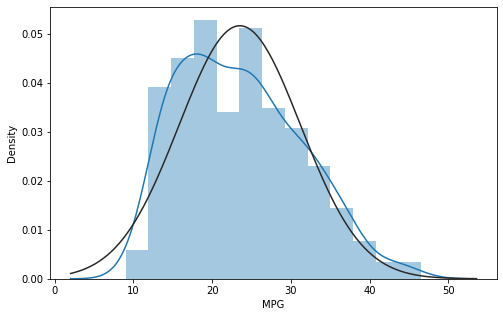

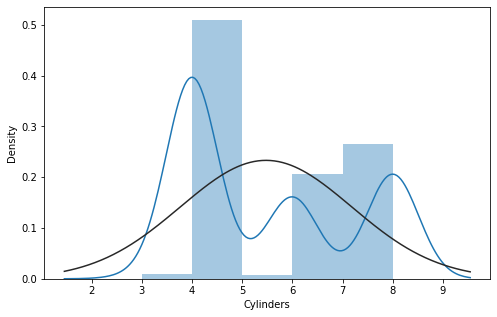

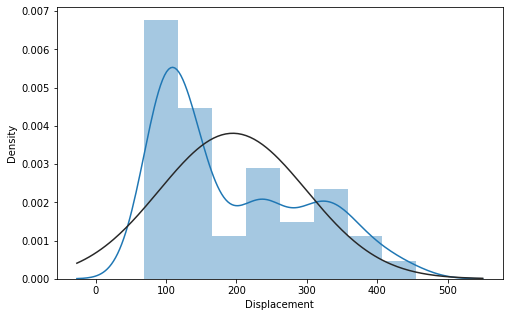

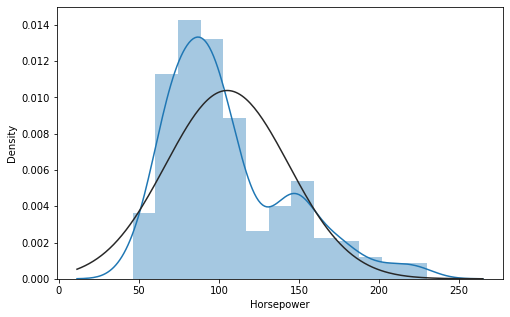

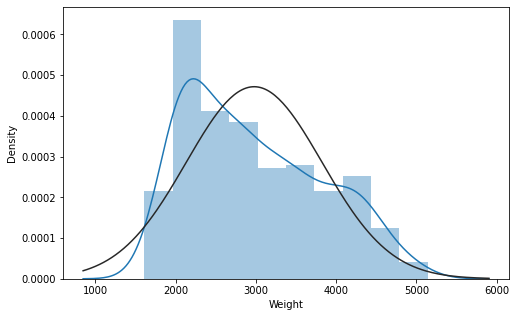

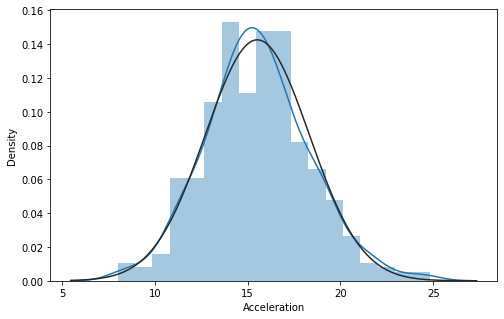

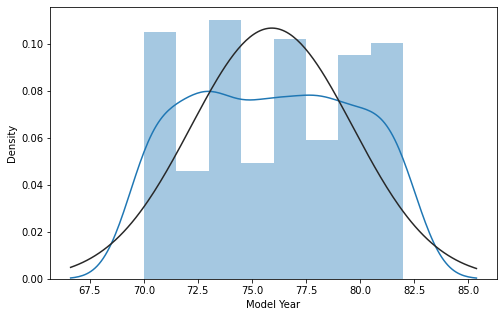

In [23]:
for column in numerical_feat.columns:
    plt.figure(figsize = (8,5))
    sns.distplot(df[column], fit=norm)
    plt.show

### Insight:Mpg and acceleration have normal distribution,Weight,Horsepower,Displacement have more likely  positively skewed  distribution but Cylinders, Model Year are far from normal dist. It makes sense because both of them are actually categorical values.

In [24]:
df['Cylinders'] = df['Cylinders'].astype(str)

numerical_feat = df.select_dtypes(exclude = "object")
categorical_feat = df.select_dtypes(include = "object")

In [25]:
def Skewness(df):
    skewed_feat = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewness = pd.DataFrame(skewed_feat, columns = ["Skew Value"])
    
    return skewness.style.background_gradient(cmap='summer')

In [26]:
Skewness(numerical_feat)

,Skew Value
Horsepower,1.037895
Displacement,0.691563
Weight,0.503814
MPG,0.459895
Acceleration,0.229372
Model Year,0.020834


In [27]:
categorical_feat.sample(5)

,Cylinders,Origin,Brand
202,4,USA,chevrolet
139,4,USA,chevrolet
185,4,Europe,peugeot
207,6,USA,ford
86,4,Europe,renault


In [28]:
df['Cylinders'].value_counts(normalize=True)

4    0.509852
8    0.266010
6    0.206897
3    0.009852
5    0.007389
Name: Cylinders, dtype: float64

Text(0.5, 1.0, 'Number of cylinders')

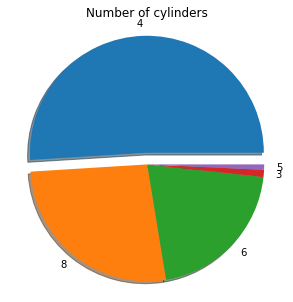

In [29]:
labels = pd.value_counts(df['Cylinders']).keys()
sizes = pd.value_counts(df['Cylinders'])
# Explode the most frequent category:
explode = [0] * len(sizes)
explode[np.argmax(list(sizes))] = 0.1
plt.figure(figsize=(5, 5))
properties = plt.pie(sizes, labels=labels, explode=explode, shadow=True)    
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of cylinders')

### **Insight:Half of the data consists of 4-cylinder cars**

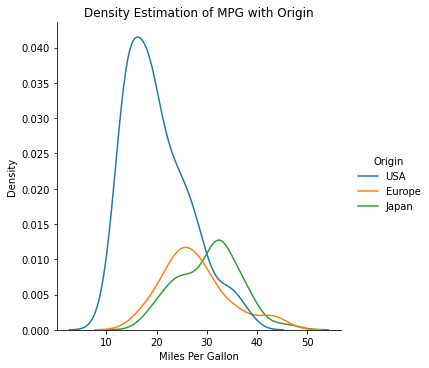

In [30]:
sns.displot(data=df, x='MPG', hue='Origin', kind='kde')
plt.title('Density Estimation of MPG with Origin')
plt.xlabel('Miles Per Gallon')
plt.show()

### **Insight:USA have by far the most cars but they have also the highest fuel-consumption**

**HEATMAP IN ALL VARIABLES**

<AxesSubplot:>

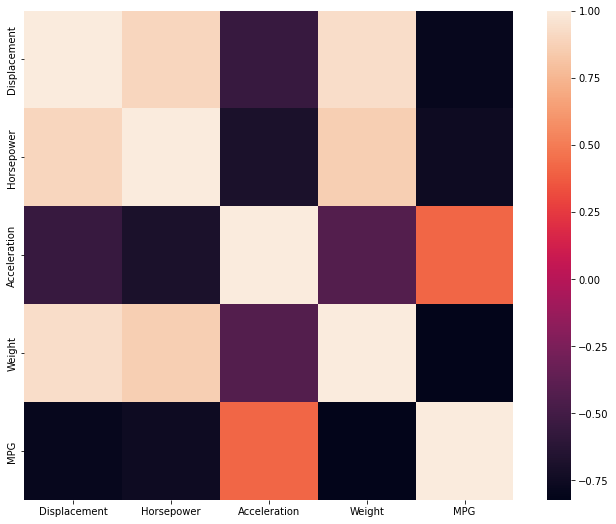

In [31]:
factors = ['Cylinders','Displacement','Horsepower','Acceleration','Weight','MPG']
corrmat = df[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

### **Insight: It is more than evident that mpg has strong correlation with horsepower,weight and displacement. Moreover, Weight and Displacement are almost linearly correlated and Horsepower and acceleration are negatively correlated**

**INSERTING A NEW COLUMN CALLED "FUEL CONSUMPTION" IN OUR DATA DIVIDING MPG IN HIGH (<17), MEDIUM(17<=X<29),LOW(>29)**








In [32]:
df['Fuel_Consumption'] = df['MPG'].apply(lambda x: 'high' if x<17 else 'low' if x>29 else 'medium')

## ENCODING CATEGORICAL DATA

#### To see which data are categorical check if they have finite values

In [33]:
df['Origin'].value_counts()

USA       254
Japan      79
Europe     73
Name: Origin, dtype: int64

**See which variables are categorical and numeric**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MPG               406 non-null    float64
 1   Cylinders         406 non-null    object 
 2   Displacement      406 non-null    float64
 3   Horsepower        406 non-null    float64
 4   Weight            406 non-null    int64  
 5   Acceleration      406 non-null    float64
 6   Model Year        406 non-null    int64  
 7   Origin            406 non-null    object 
 8   Brand             406 non-null    object 
 9   Fuel_Consumption  406 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 31.8+ KB


In [35]:
#categorical = list(df.select_dtypes(include=['object']).columns)
#numeric = list(df.select_dtypes(exclude=['object']).columns)
#print(f'categorical variables:  {categorical}')
#print(f'numerical variables:  {numeric}')

**Distribution of categorical variables**

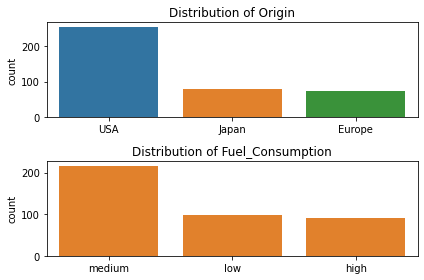

In [36]:
ax1 = plt.subplot(2,1,1)
sns.countplot(df['Origin'], order=df['Origin'].value_counts().index)
ax1.set_xlabel(None)
ax1.set_title(f'Distribution of Origin')
ax2 = plt.subplot(2,1,2)
sns.countplot(df['Fuel_Consumption'], color='C1', order=df['Fuel_Consumption'].value_counts().index)
ax2.set_xlabel(None)
ax2.set_title(f'Distribution of Fuel_Consumption')
plt.tight_layout()
plt.show()

### Insight 1: We notice that most of the cars come from USA
### Insight 2: We notice also that most of the cars have medium Fuel_Consumption


**Cylinders per car manufacturer**

Text(0.5, 1.0, 'Cylinders per car manufacturer')

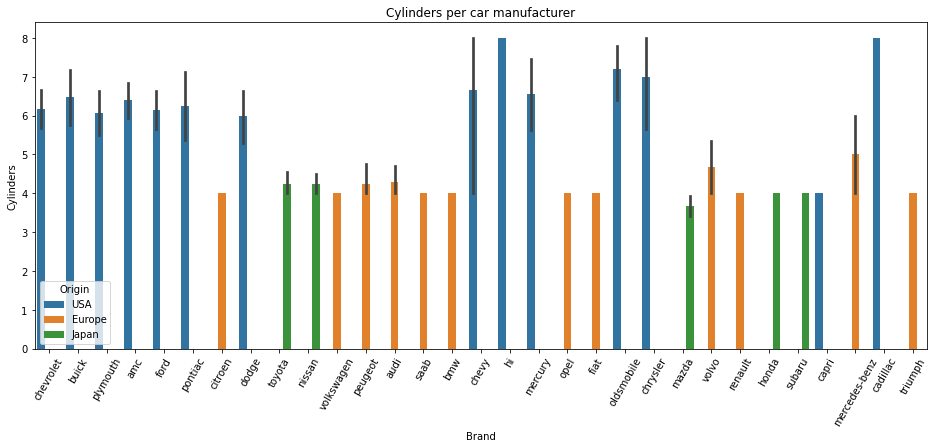

In [37]:
plt.figure(figsize = (16,6))
df[["Cylinders"]] = df[["Cylinders"]].apply(pd.to_numeric)
sns.barplot(x='Brand', y='Cylinders', hue='Origin', data=df)
plt.xticks(rotation=60)
plt.title('Cylinders per car manufacturer')


### Insight: Brands with no confidence interval have used the same number of cylinders in all their cars

**MPG level per car manufacturer**

Text(0.5, 1.0, 'MPG level per car manufacturer')

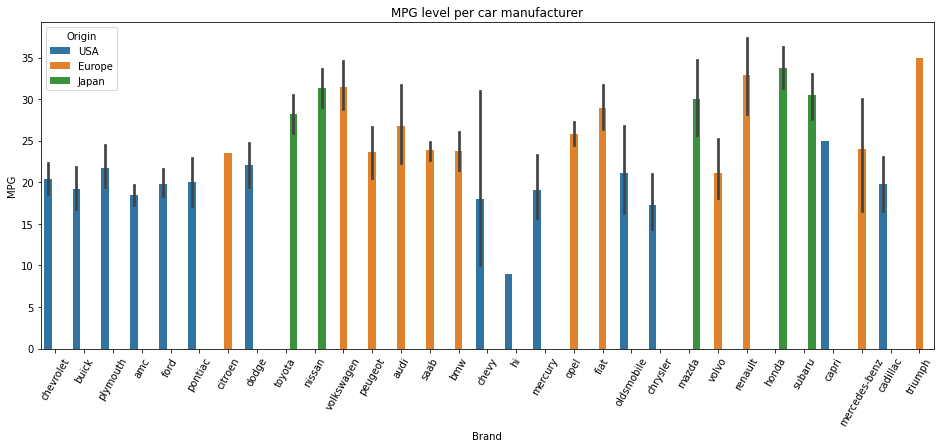

In [38]:
plt.figure(figsize = (16,6))
sns.barplot(x='Brand', y='MPG', hue='Origin', data=df)
plt.xticks(rotation=60)
plt.title('MPG level per car manufacturer')

**MPG level by model year**

Text(0.5, 1.0, 'MPG level by model year')

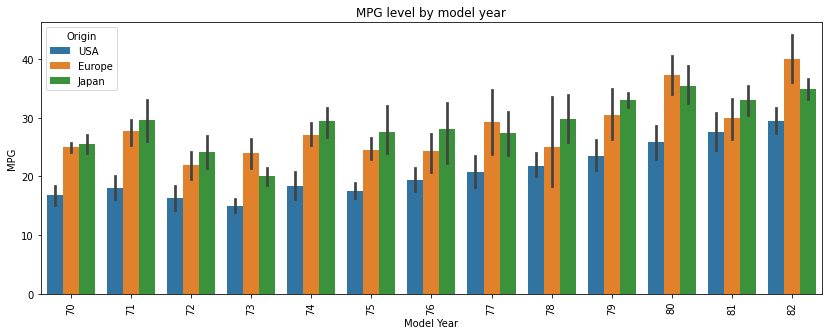

In [39]:
plt.figure(figsize = (14,5))
sns.barplot(x='Model Year', y='MPG', hue='Origin', data=df)
plt.xticks(rotation='vertical')
plt.title('MPG level by model year')

### Insight 1: USA has the lowest MPG level through the years 

### **Insight 2: From the barplot can be assumed that as years pass the fuel-consumption for all origins is reduced**

#### **Plotting combination of categorical data**

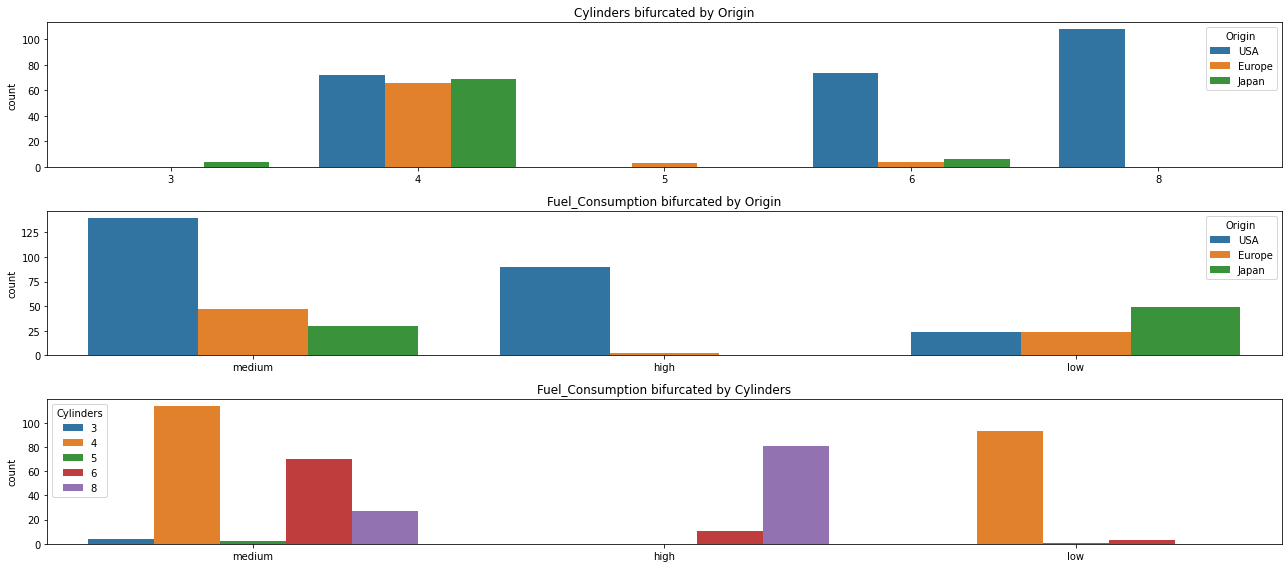

In [40]:
combos = itertools.combinations(['Origin', 'Cylinders', 'Fuel_Consumption'], 2)

fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:
    i+=1
    ax = plt.subplot(3,1,i)
    sns.countplot(x=pair[1], hue=pair[0], data=df)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}')
    plt.tight_layout()

### Insight: Graph 3 indicates that more cylinders equal higher fuel consumption

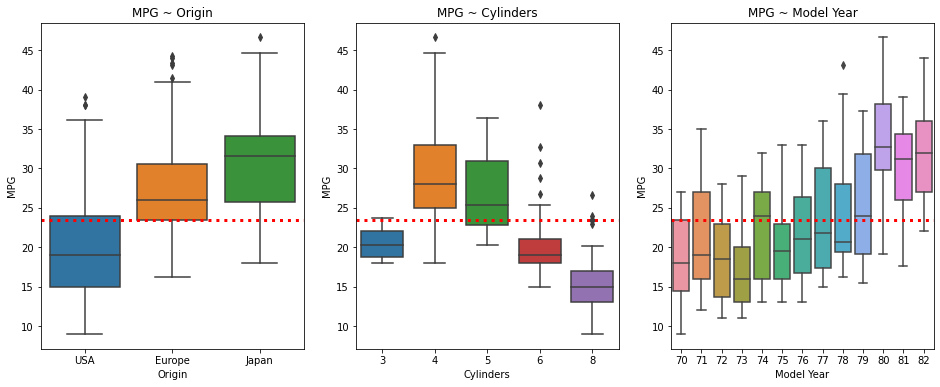

In [41]:
plt.figure(figsize = (16,6))

ax = plt.subplot(131)
ax = sns.boxplot(x = 'Origin', y = 'MPG', data = df)
plt.axhline(df.MPG.mean(), color='r', linestyle='dotted', linewidth=3)
ax.set_title('MPG ~ Origin')

ax = plt.subplot(132)
ax = sns.boxplot(x = 'Cylinders', y = 'MPG', data = df, ax = ax)
ax.set_title('MPG ~ Cylinders')
plt.axhline(df.MPG.mean(), color='r', linestyle='dotted', linewidth=3)

ax = plt.subplot(133)
ax = sns.boxplot(x = 'Model Year', y = 'MPG', data = df, ax = ax)
ax.set_title('MPG ~ Model Year')
plt.axhline(df.MPG.mean(), color='r', linestyle='dotted', linewidth=3)



### Insight 1: Graph 1 indicates that USA cars' fuel consumption is constantly over the average
### Insight 2: Graph 2 shows that cars with 4 and 5 cylinders are performing better than the rest

In [42]:
df[df['Cylinders'] == '6'].sort_values(['MPG'], ascending = False).head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Brand,Fuel_Consumption


In [43]:
df[df['Cylinders'] == '8'].sort_values(['MPG'], ascending = False).head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Brand,Fuel_Consumption


In [44]:
df[df['Model Year'] == 78].sort_values(['MPG'], ascending = False).head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Brand,Fuel_Consumption
251,43.1,4,90.0,48.0,1985,21.5,78,Europe,volkswagen,low
254,39.4,4,85.0,70.0,2070,18.6,78,Japan,nissan,low
252,36.1,4,98.0,66.0,1800,14.4,78,USA,ford,low
255,36.1,4,91.0,60.0,1800,16.4,78,Japan,honda,low
253,32.8,4,78.0,52.0,1985,19.4,78,Japan,mazda,low


##  ONE HOT ENCODED TO CATEGORICAL DATA(CYLINDERS AND ORIGIN)

In [45]:
df=pd.get_dummies(df,columns=['Cylinders','Origin'])
df

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year,Brand,Fuel_Consumption,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,307.0,130.0,3504,12.0,70,chevrolet,medium,0,0,0,0,1,0,0,1
1,15.0,350.0,165.0,3693,11.5,70,buick,high,0,0,0,0,1,0,0,1
2,18.0,318.0,150.0,3436,11.0,70,plymouth,medium,0,0,0,0,1,0,0,1
3,16.0,304.0,150.0,3433,12.0,70,amc,high,0,0,0,0,1,0,0,1
4,17.0,302.0,140.0,3449,10.5,70,ford,medium,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,140.0,86.0,2790,15.6,82,ford,medium,0,1,0,0,0,0,0,1
402,44.0,97.0,52.0,2130,24.6,82,volkswagen,low,0,1,0,0,0,1,0,0
403,32.0,135.0,84.0,2295,11.6,82,dodge,low,0,1,0,0,0,0,0,1
404,28.0,120.0,79.0,2625,18.6,82,ford,medium,0,1,0,0,0,0,0,1


## ANALYSIS ON NUMERIC VARIABLES

**Distribution and Boxplot in numeric variables**

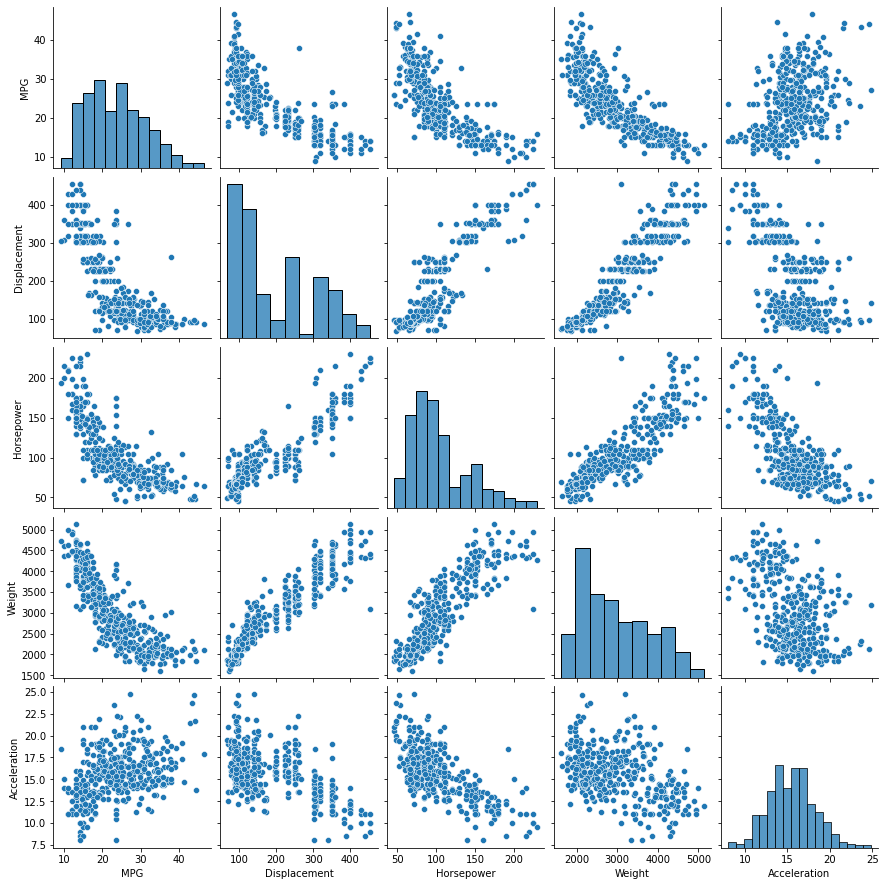

In [46]:
numeric_var = ['MPG',  'Displacement', 'Horsepower', 'Weight', 'Acceleration']
df4=df[numeric_var]
sns.pairplot(df4)
plt.show()

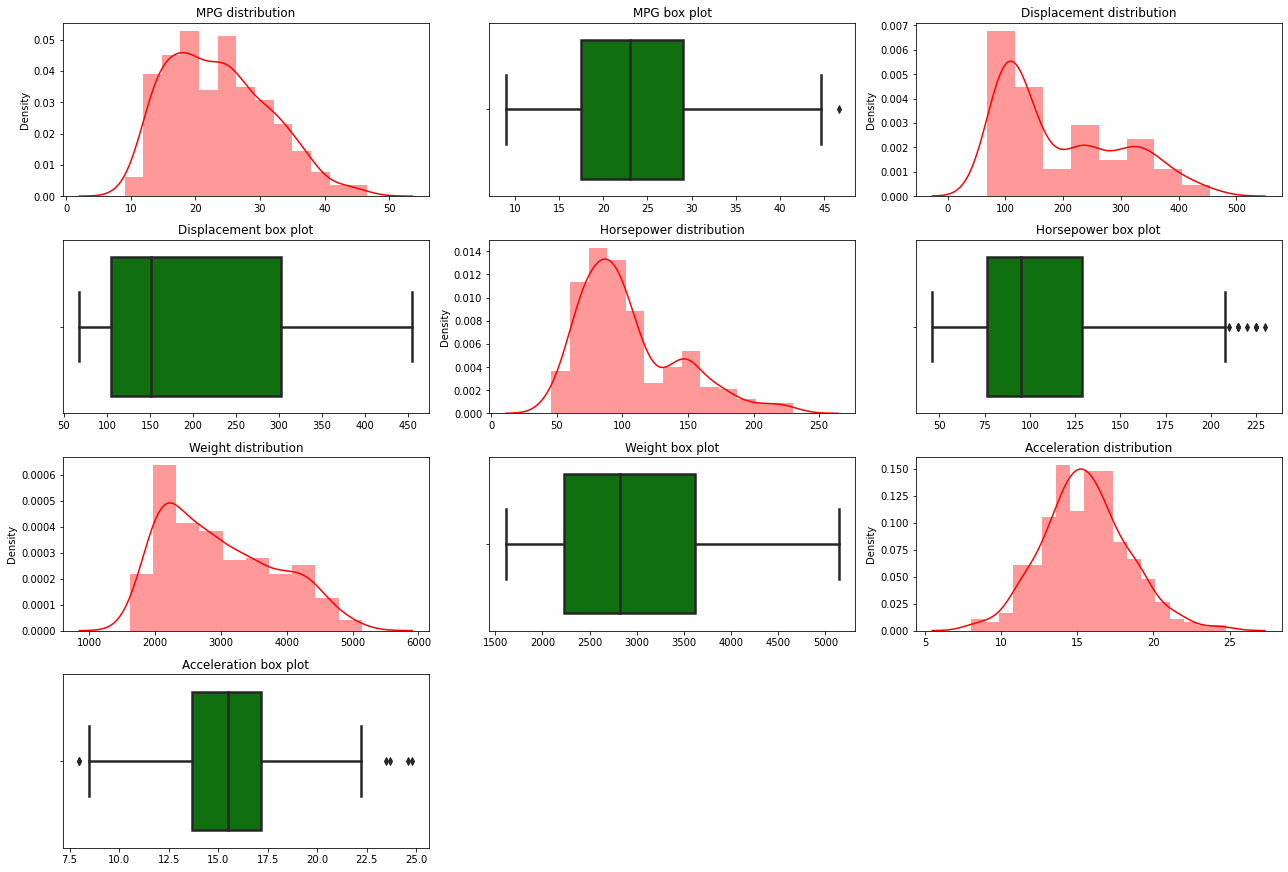

In [47]:
rows = len(numeric_var)
cols = 3

fig = plt.figure(2, (18, rows*3))

i = 0
for col in numeric_var:
    ###DISTRIBUTION PLOTS###
    i += 1
    ax1 = plt.subplot(rows, cols,i)

    sns.distplot(df[col],color='r')
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()
    ###BOX PLOTS###

    i += 1
    ax2 = plt.subplot(rows, cols,i)
    sns.boxplot(df[col],color='g', orient='h', linewidth=2.5)
    ax2.set_xlabel(None)
    ax2.set_title(f'{col} box plot')
    plt.tight_layout()

## Finding outliers 


#### As we can see from the box plots above, outliers (are points which lie outside the bars extending the plot) exist in acceleration,horsepower 

### **Tukey method to find outliers**

#### Tukey's range test, also known as Tukey's test, Tukey method, Tukey's honest significance test, or Tukey's HSD (honestly significant difference) test, is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other.

In [48]:
def find_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers
for col in numeric_var:
    outliers = find_outliers(df[col])
    if len(outliers):
        print(f"* {col} has these  outliers,\n{outliers}\n")
        print(f"* {col} has {df[col].count()}   values.\n")
        print(f"* Percentage of outliers is {100*len(outliers)/df[col].count()} %  \n")
    else:
        print(f"* {col} doesn't have any  outliers.\n")

* MPG has these  outliers,
329    46.6
Name: MPG, dtype: float64

* MPG has 406   values.

* Percentage of outliers is 0.24630541871921183 %  

* Displacement doesn't have any  outliers.

* Horsepower has these  outliers,
6      220.0
7      215.0
8      225.0
19     225.0
31     215.0
33     210.0
101    215.0
102    225.0
123    230.0
Name: Horsepower, dtype: float64

* Horsepower has 406   values.

* Percentage of outliers is 2.2167487684729066 %  

* Weight doesn't have any  outliers.

* Acceleration has these  outliers,
16      8.0
17      8.0
66     23.5
306    24.8
333    23.7
402    24.6
Name: Acceleration, dtype: float64

* Acceleration has 406   values.

* Percentage of outliers is 1.477832512315271 %  



# **Suggested solution to handle outliers**

**Since the percentage of outliers is bigger than 0,3%(upper bound percentage of outliers in data pints)  in horsepower(2,21%) and acceleration (1,47%) so we cannot neglect them or drop them since they are significant percentage of data and it will lead to wrong conclusions**

## Min-max scaling-Standarization-Normalization
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35,  https://scikit-learn.org/stable/modules/preprocessing.html

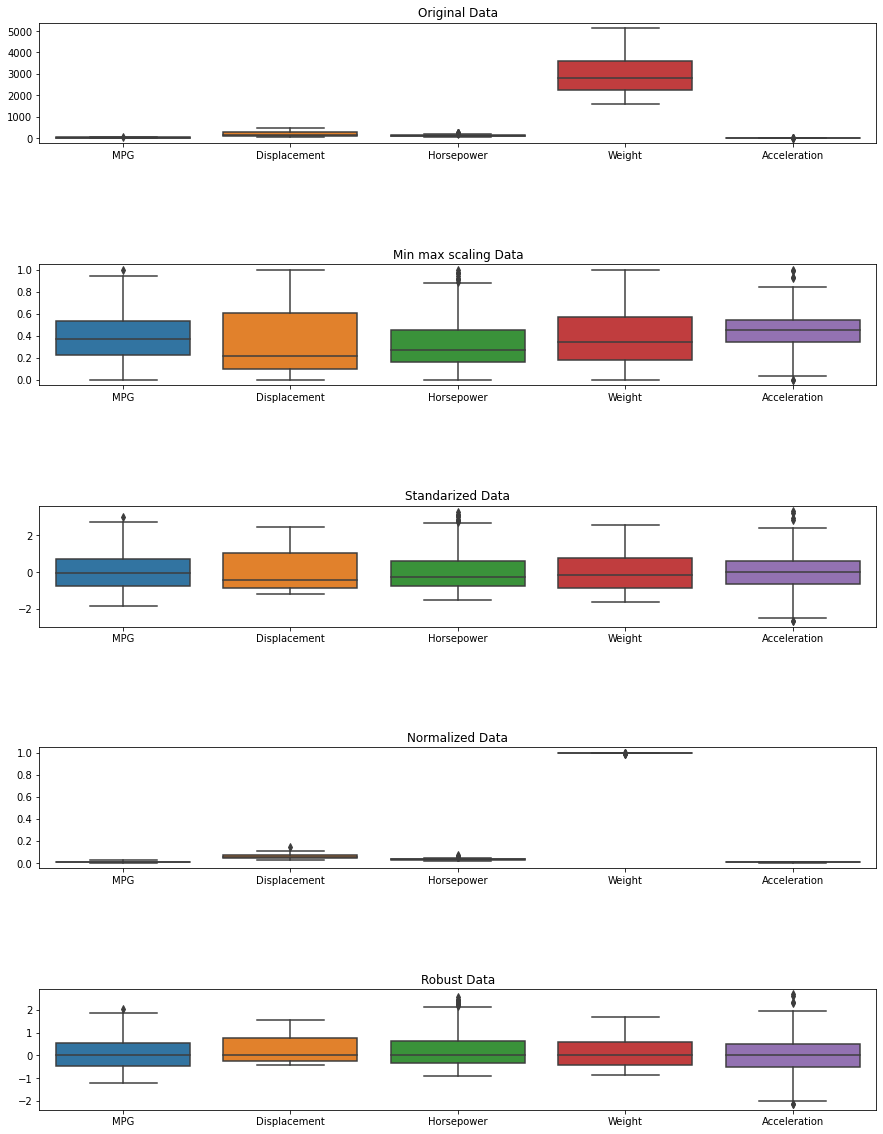

In [49]:
from sklearn import preprocessing

####MIN MAX SCALER  we won't use it because it is sensitive to outliers###
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
data_after_min_max_scaler = min_max_scaler.fit_transform(df.iloc[:,0:5].values)

df5 = pd.DataFrame(data_after_min_max_scaler,columns= numeric_var)
###STANDARD SCALER  we won't use it either because reruires all data are nrmally distributed##

Standardisation = preprocessing.StandardScaler().fit_transform(df.iloc[:,0:5].values)
df6 = pd.DataFrame(Standardisation,columns= numeric_var)

###NORMALIZER SCALER##
Normalization = preprocessing.Normalizer().fit_transform(df.iloc[:,0:5].values)
df7 = pd.DataFrame(Normalization,columns= numeric_var)
##ROBUST SCALER if we want to handle successfully our outliers it is recommended##
RobustScaling = preprocessing.RobustScaler().fit_transform(df.iloc[:,0:5].values)
df8 = pd.DataFrame(RobustScaling ,columns= numeric_var)


fig = plt.figure()
fig.subplots_adjust(hspace=1, wspace=0.5)
fig.set_figheight(20)
fig.set_figwidth(15)

ax1 = fig.add_subplot(5,1,1)
sns.boxplot(data= df.iloc[:,0:5])
ax1.title.set_text('Original Data')

ax2 = fig.add_subplot(5,1,2)
sns.boxplot(data = df5)
ax2.title.set_text('Min max scaling Data')

ax3 = fig.add_subplot(5,1,3)
sns.boxplot(data = df6)
ax3.title.set_text('Standarized Data')

ax4 = fig.add_subplot(5,1,4)
sns.boxplot(data = df7)
ax4.title.set_text('Normalized Data')

ax5 = fig.add_subplot(5,1,5)
sns.boxplot(data = df8)
ax5.title.set_text('Robust Data')